In [54]:
#****************************************************************************************************************************************
#Programa: Analisis de Mortalidad - Por Pais.ipynb                                                                                                         *
#Lenguaje: Python en ambiente Google Colab                                                                                              *
#Utilidad:                                                                                                                              *
#Series de tiempo.                                                                                                                      *
#Realizado por: Instituto Salud Global de la Universidad Argentina John F. Kennedy.                                                     *
#Programadores: Ernesto Freiberg y Alvin Correa                                                                                         *
#Observaciones:                                                                                                                         *
#                                                                                                                                       *
#****************************************************************************************************************************************
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import statsmodels.discrete.discrete_model as sm

In [55]:
download_excel = False

In [56]:
xls = pd.ExcelFile('https://github.com/saludglobaluk/colorectal_cancel_mortality_south_america/blob/main/data/Colorectal_Cancer_Incidences_And_Deaths.xlsx?raw=true')

In [57]:
of = pd.read_excel(xls, 'Base de datos incidencias 20-03')
of = of.rename(columns = {'cantidad': 'incidencias'})
of.rango_edad = of.rango_edad.str.replace(r"(\d\d\-\d\d|\d\d\+).+", r"\1", regex = True)
inc = of[of.sexo == 'Both']

In [58]:
of = pd.read_excel(xls, 'Base de datos decesos 20-03-202')
of = of.rename(columns = {'cantidad': 'muertes', 'Sexo': 'sexo'})
of.drop(['ubicacion', 'causa_deceso'], axis=1, inplace = True)
of.rango_edad = of.rango_edad.str.replace(r"(\d\d\-\d\d|\d\d\+).+", r"\1", regex = True)
dec = of[of.sexo == 'Ambos']

In [ ]:
of = pd.read_excel(xls, 'Base de datos de población 20-0')
of = of.rename(columns = {'cantidad': 'poblacion', 'sexos': 'sexo'})
of.drop(['ubicacion', 'Medicion'], axis=1, inplace = True)
of.rango_edad = of.rango_edad.str.replace(r"(\d\d).+?(\d\d)", r"\1-\2", regex = True)
of.rango_edad = of.rango_edad.str.replace(r"(\d\d) plus", r"\1+", regex = True)
pob = of[of.sexo == 'Ambos']

In [59]:
conjunto = inc.ubicacion.unique() 
conjunto.sort()
conjunto

array(['Argentina', 'Bolivia (Plurinational State of)', 'Brazil', 'Chile',
       'Colombia', 'Ecuador', 'Paraguay', 'Peru', 'Uruguay',
       'Venezuela (Bolivarian Republic of)'], dtype=object)

In [60]:
full = pd.merge(inc, dec, how='inner', on=['anio', 'codigo_pais', 'rango_edad'])
full = pd.merge(full, pob, how='inner', on=['anio', 'codigo_pais', 'rango_edad'])

full['tasa_mortalidad'] = full.muertes*100000/full.poblacion
full['tasa_incidencia'] = full.incidencias*100000/full.poblacion
full['proporcion'] = full.incidencias*100/full.muertes

full.sort_values(by=['rango_edad', 'ubicacion', 'anio'], inplace = True)
full.head()

,medida,codigo_pais,ubicacion,sexo_x,rango_edad,causa_deceso,anio,incidencias,sexo_y,muertes,sexo,poblacion,tasa_mortalidad,tasa_incidencia,proporcion
707,Incidence,1,Argentina,Both,50-54,Colon and rectum cancer,1990,467,Ambos,308,Ambos,1517679,20.294147,30.770670,151.623377
708,Incidence,1,Argentina,Both,50-54,Colon and rectum cancer,1991,476,Ambos,312,Ambos,1533647,20.343664,31.037129,152.564103
709,Incidence,1,Argentina,Both,50-54,Colon and rectum cancer,1992,510,Ambos,325,Ambos,1554375,20.908725,32.810615,156.923077
710,Incidence,1,Argentina,Both,50-54,Colon and rectum cancer,1993,514,Ambos,326,Ambos,1578669,20.650307,32.559073,157.668712
711,Incidence,1,Argentina,Both,50-54,Colon and rectum cancer,1994,523,Ambos,327,Ambos,1606001,20.361133,32.565360,159.938838


In [61]:
def subplot_dataframe(values):
  fig, axs = plt.subplots(ncols=2, nrows=5, figsize=(18, 20), layout="tight")

  for (ubicacion, ax) in zip(conjunto, axs.flatten()):
    cto = full.query(f'ubicacion == "{ubicacion}"')
    pf = pd.pivot_table(cto.reset_index(), values=values, index='anio', columns=['rango_edad'])
    pf.plot(ax=ax, kind='line', title=f'Ubicacion - {ubicacion}')  
    ax.legend(bbox_to_anchor=(1.01, 1), fontsize="8", loc='upper left', ncol=1 )


  fig.suptitle(values, fontsize=16, y=1)
  plt.show()

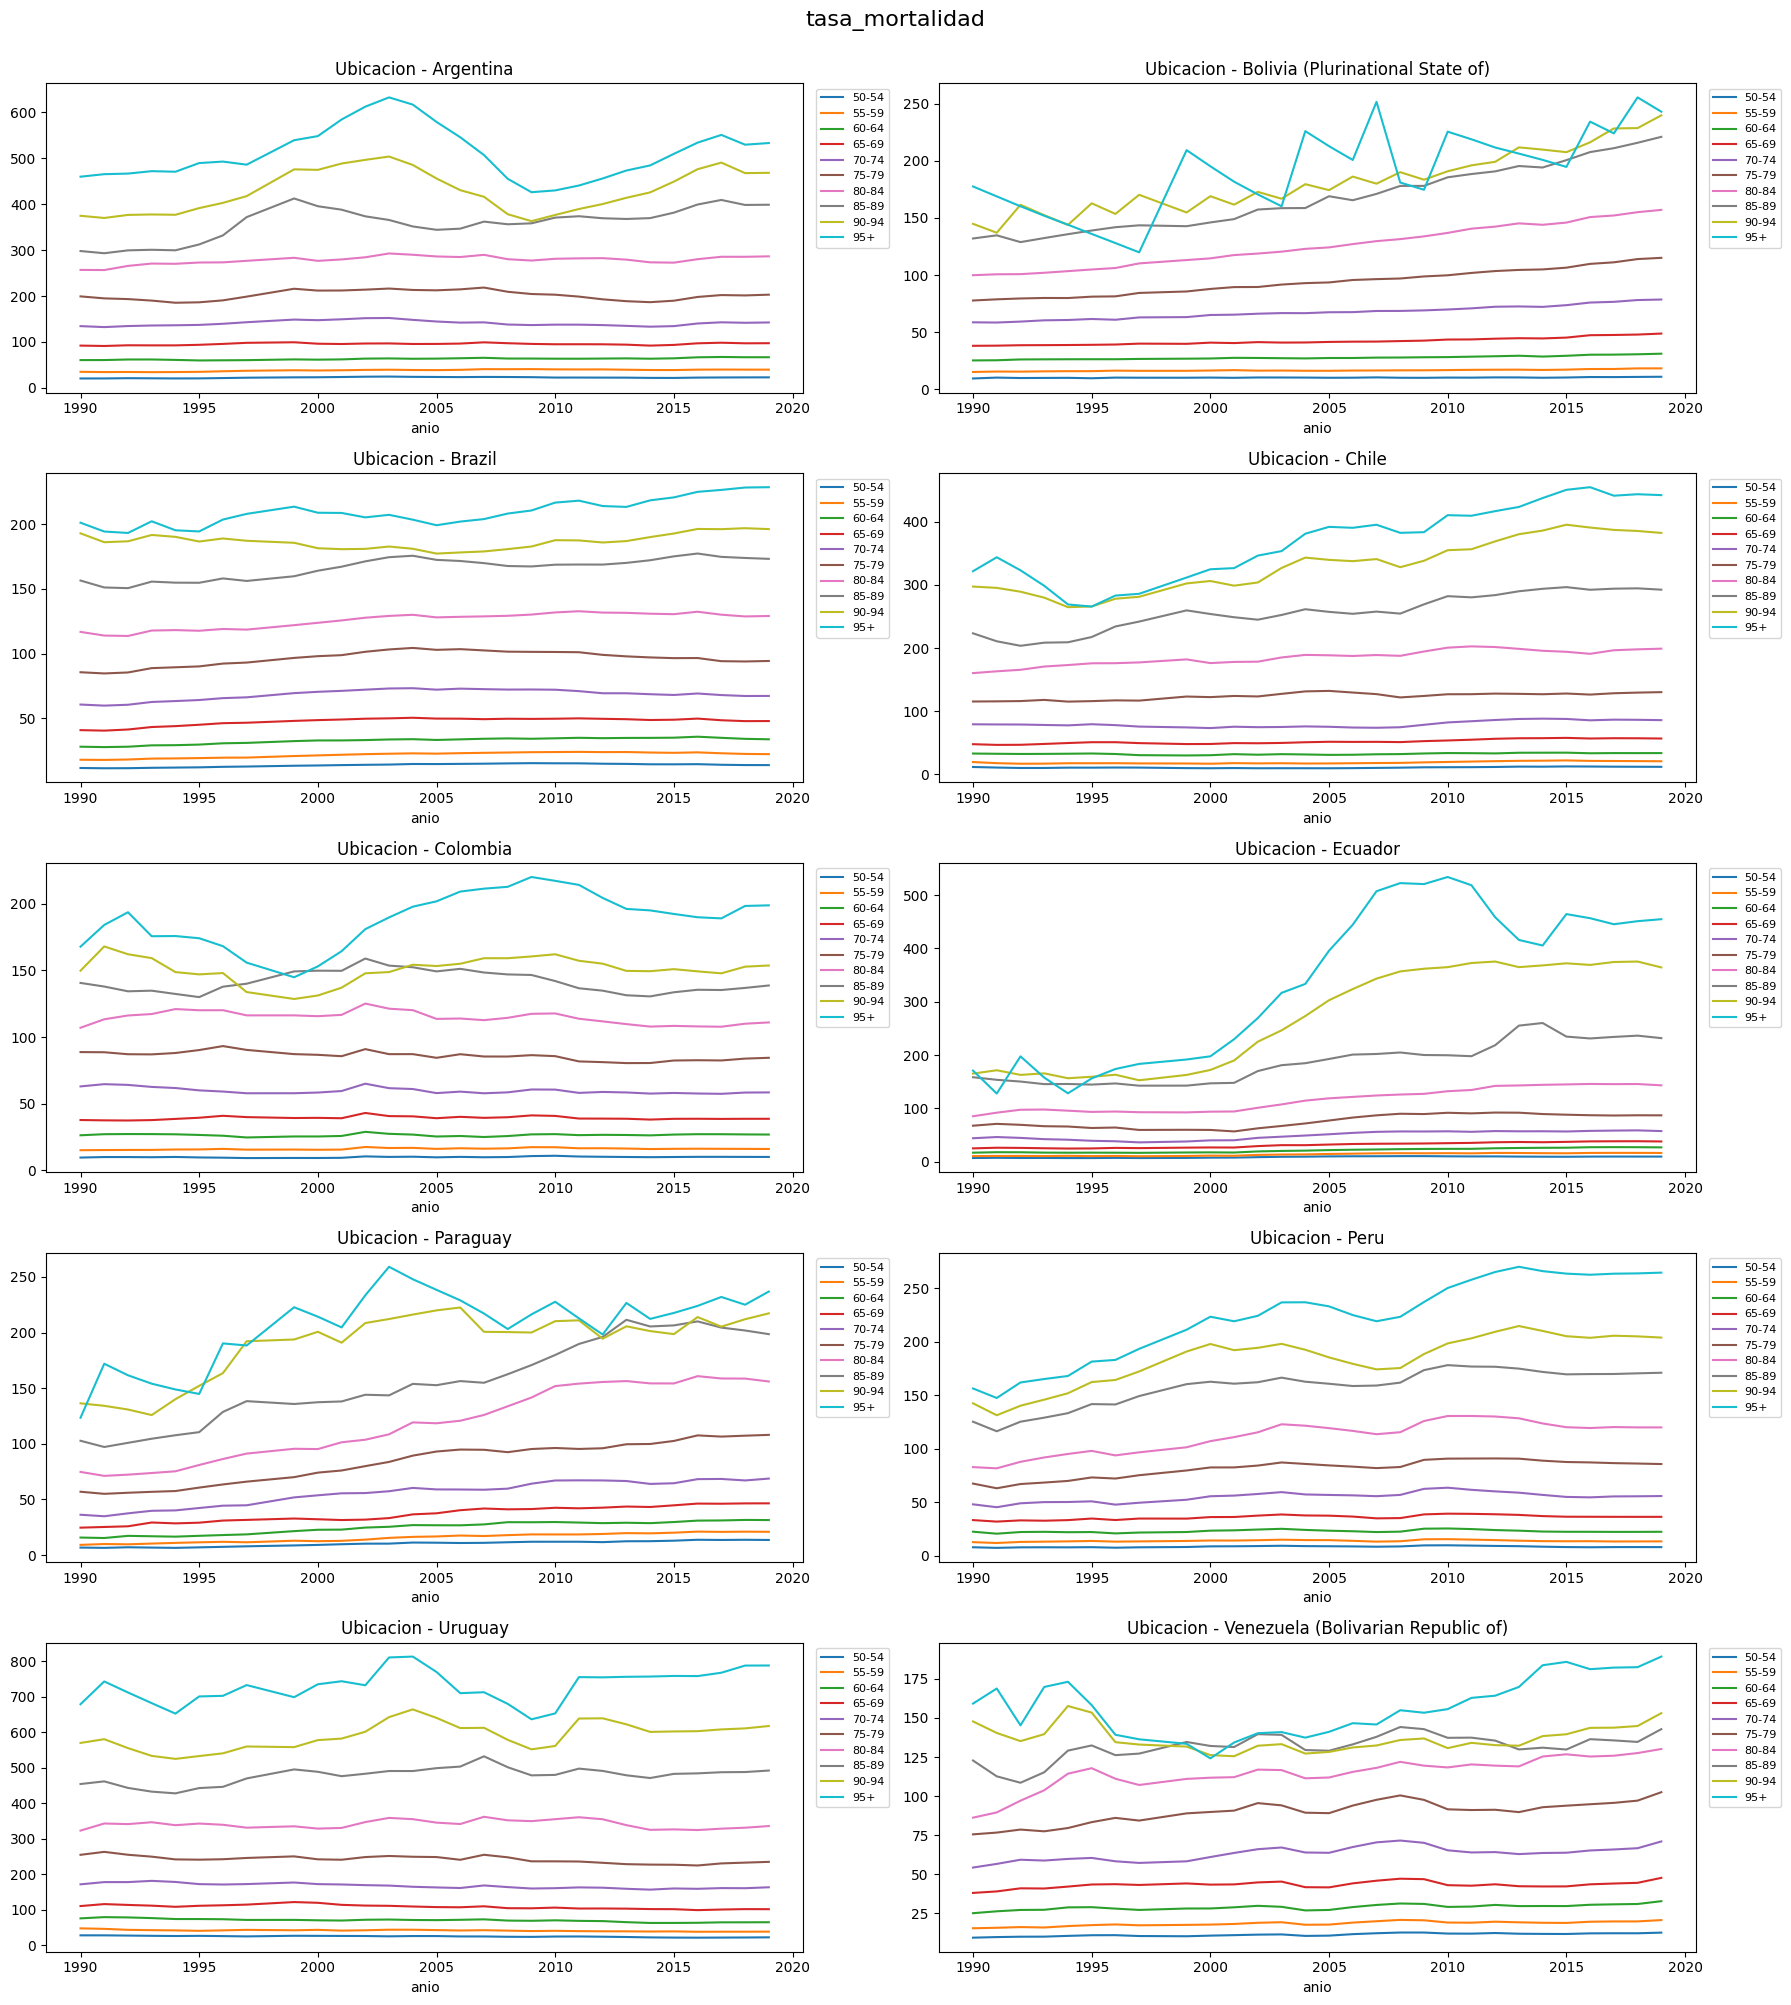

In [62]:
subplot_dataframe('tasa_mortalidad')

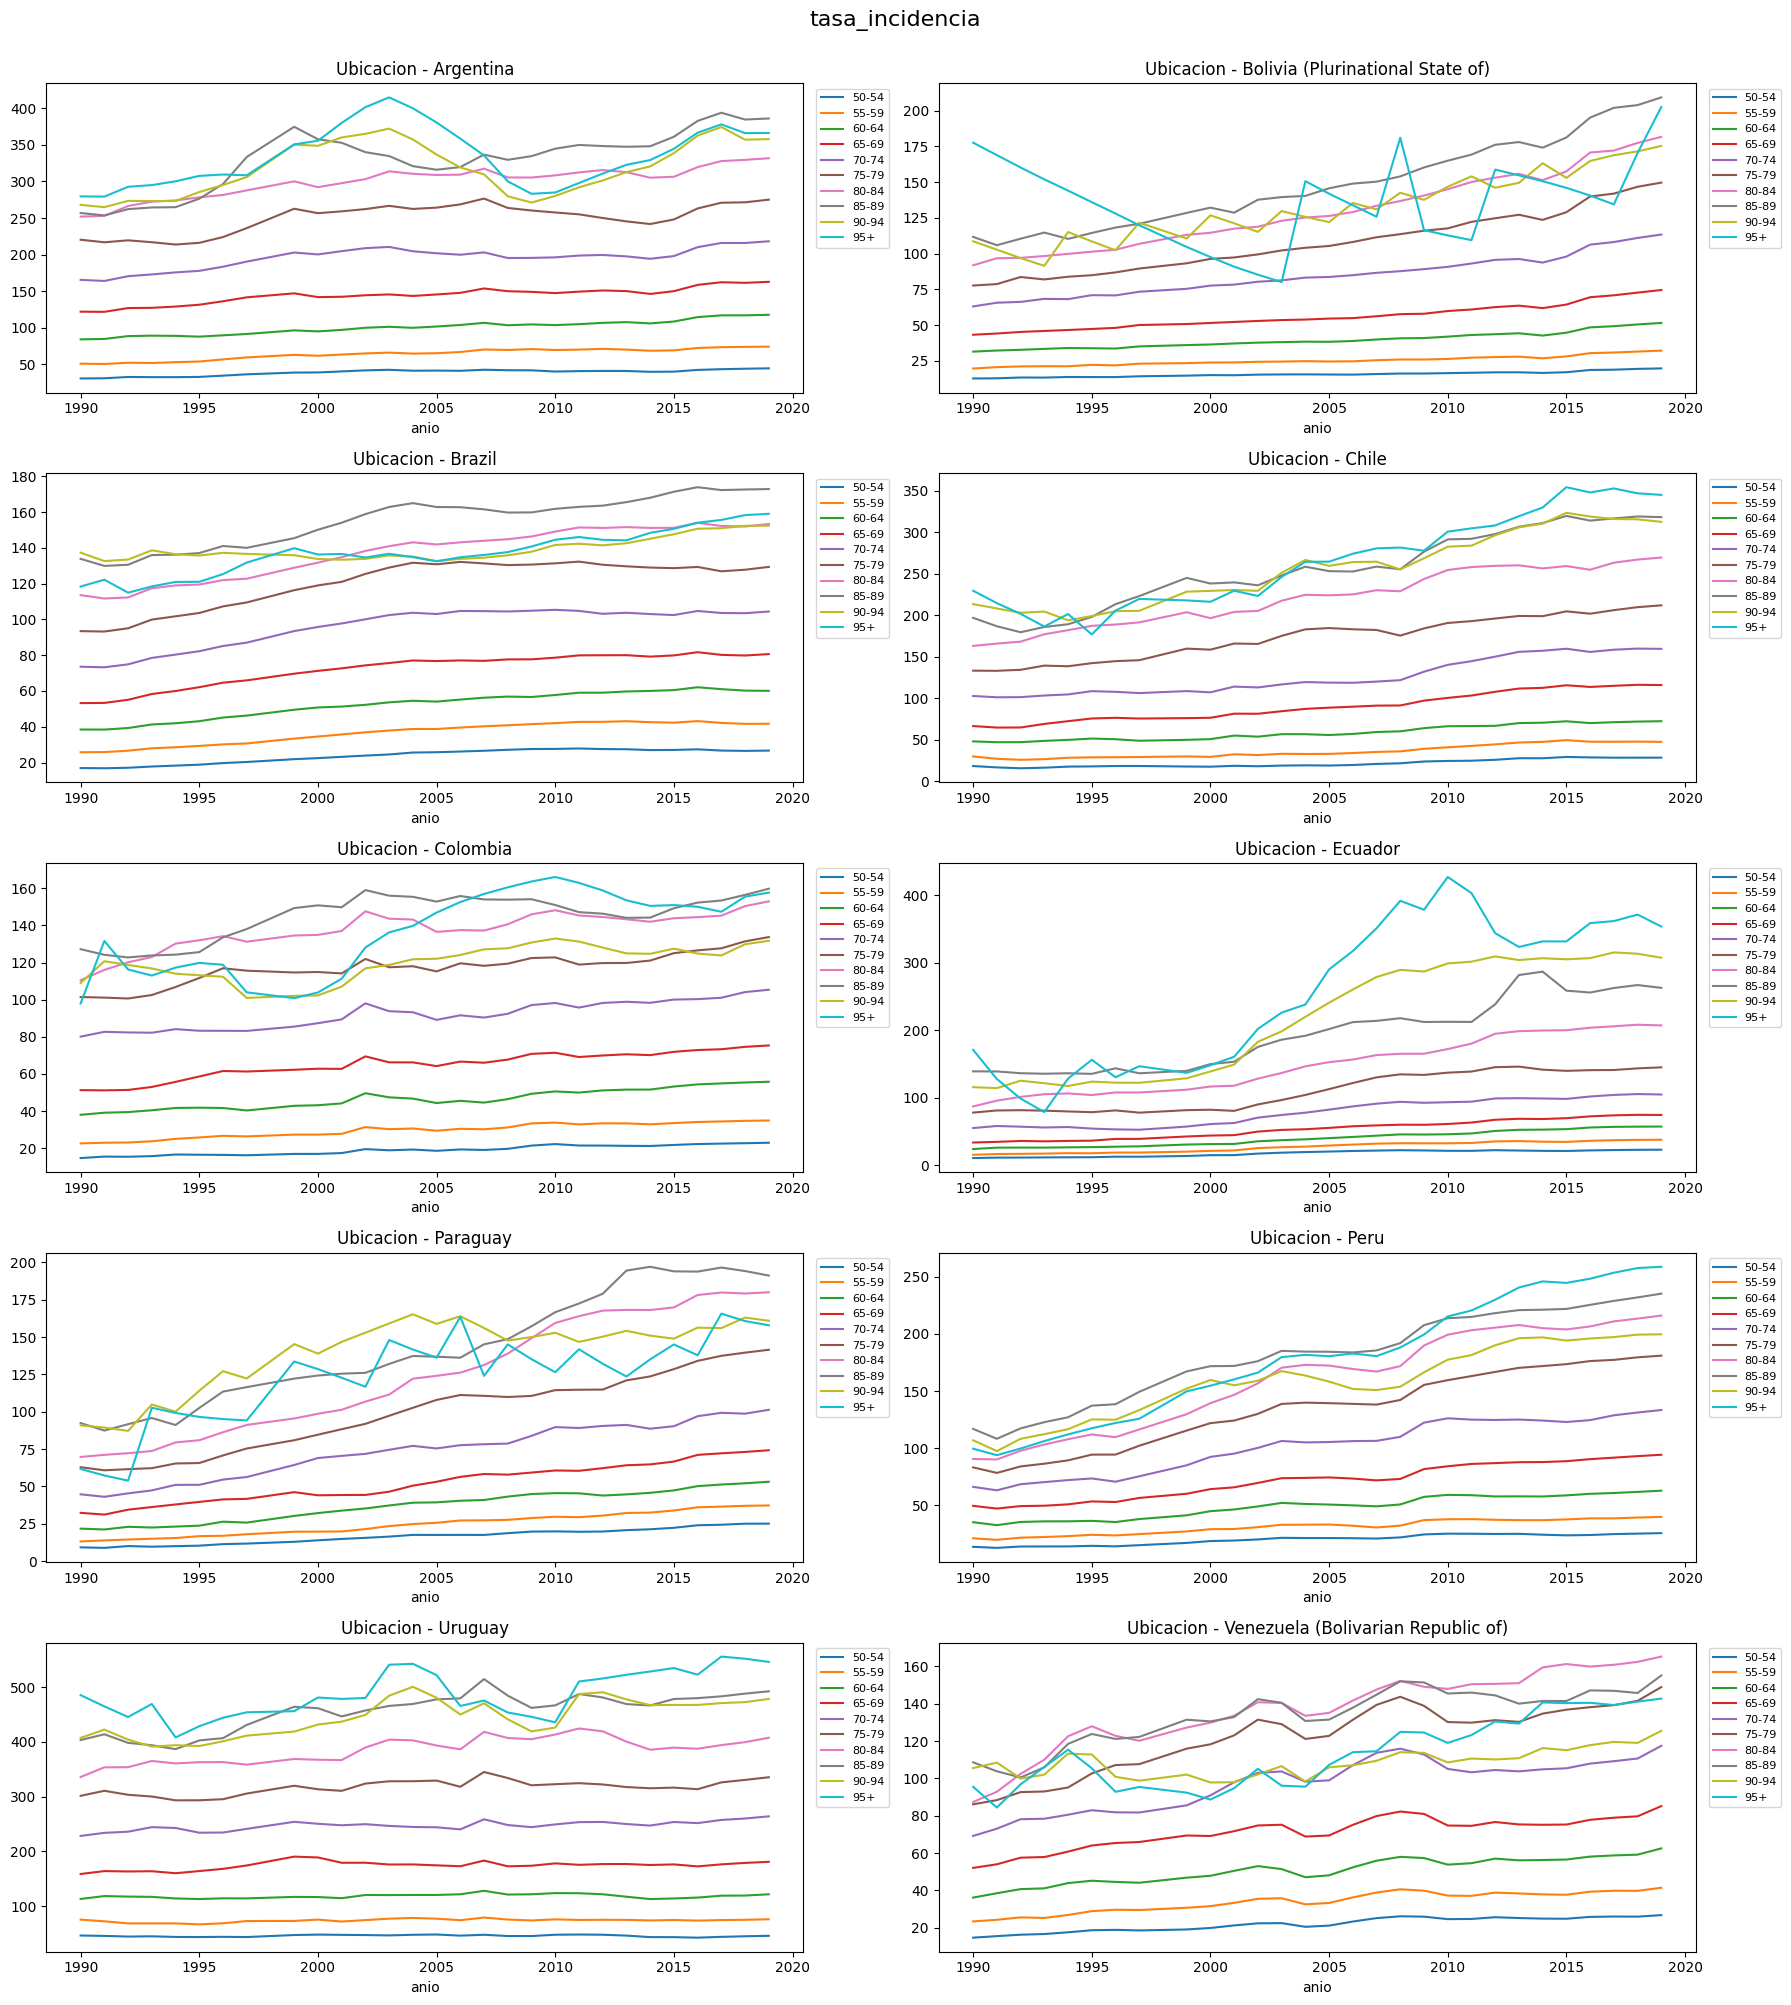

In [ ]:
subplot_dataframe('tasa_incidencia')

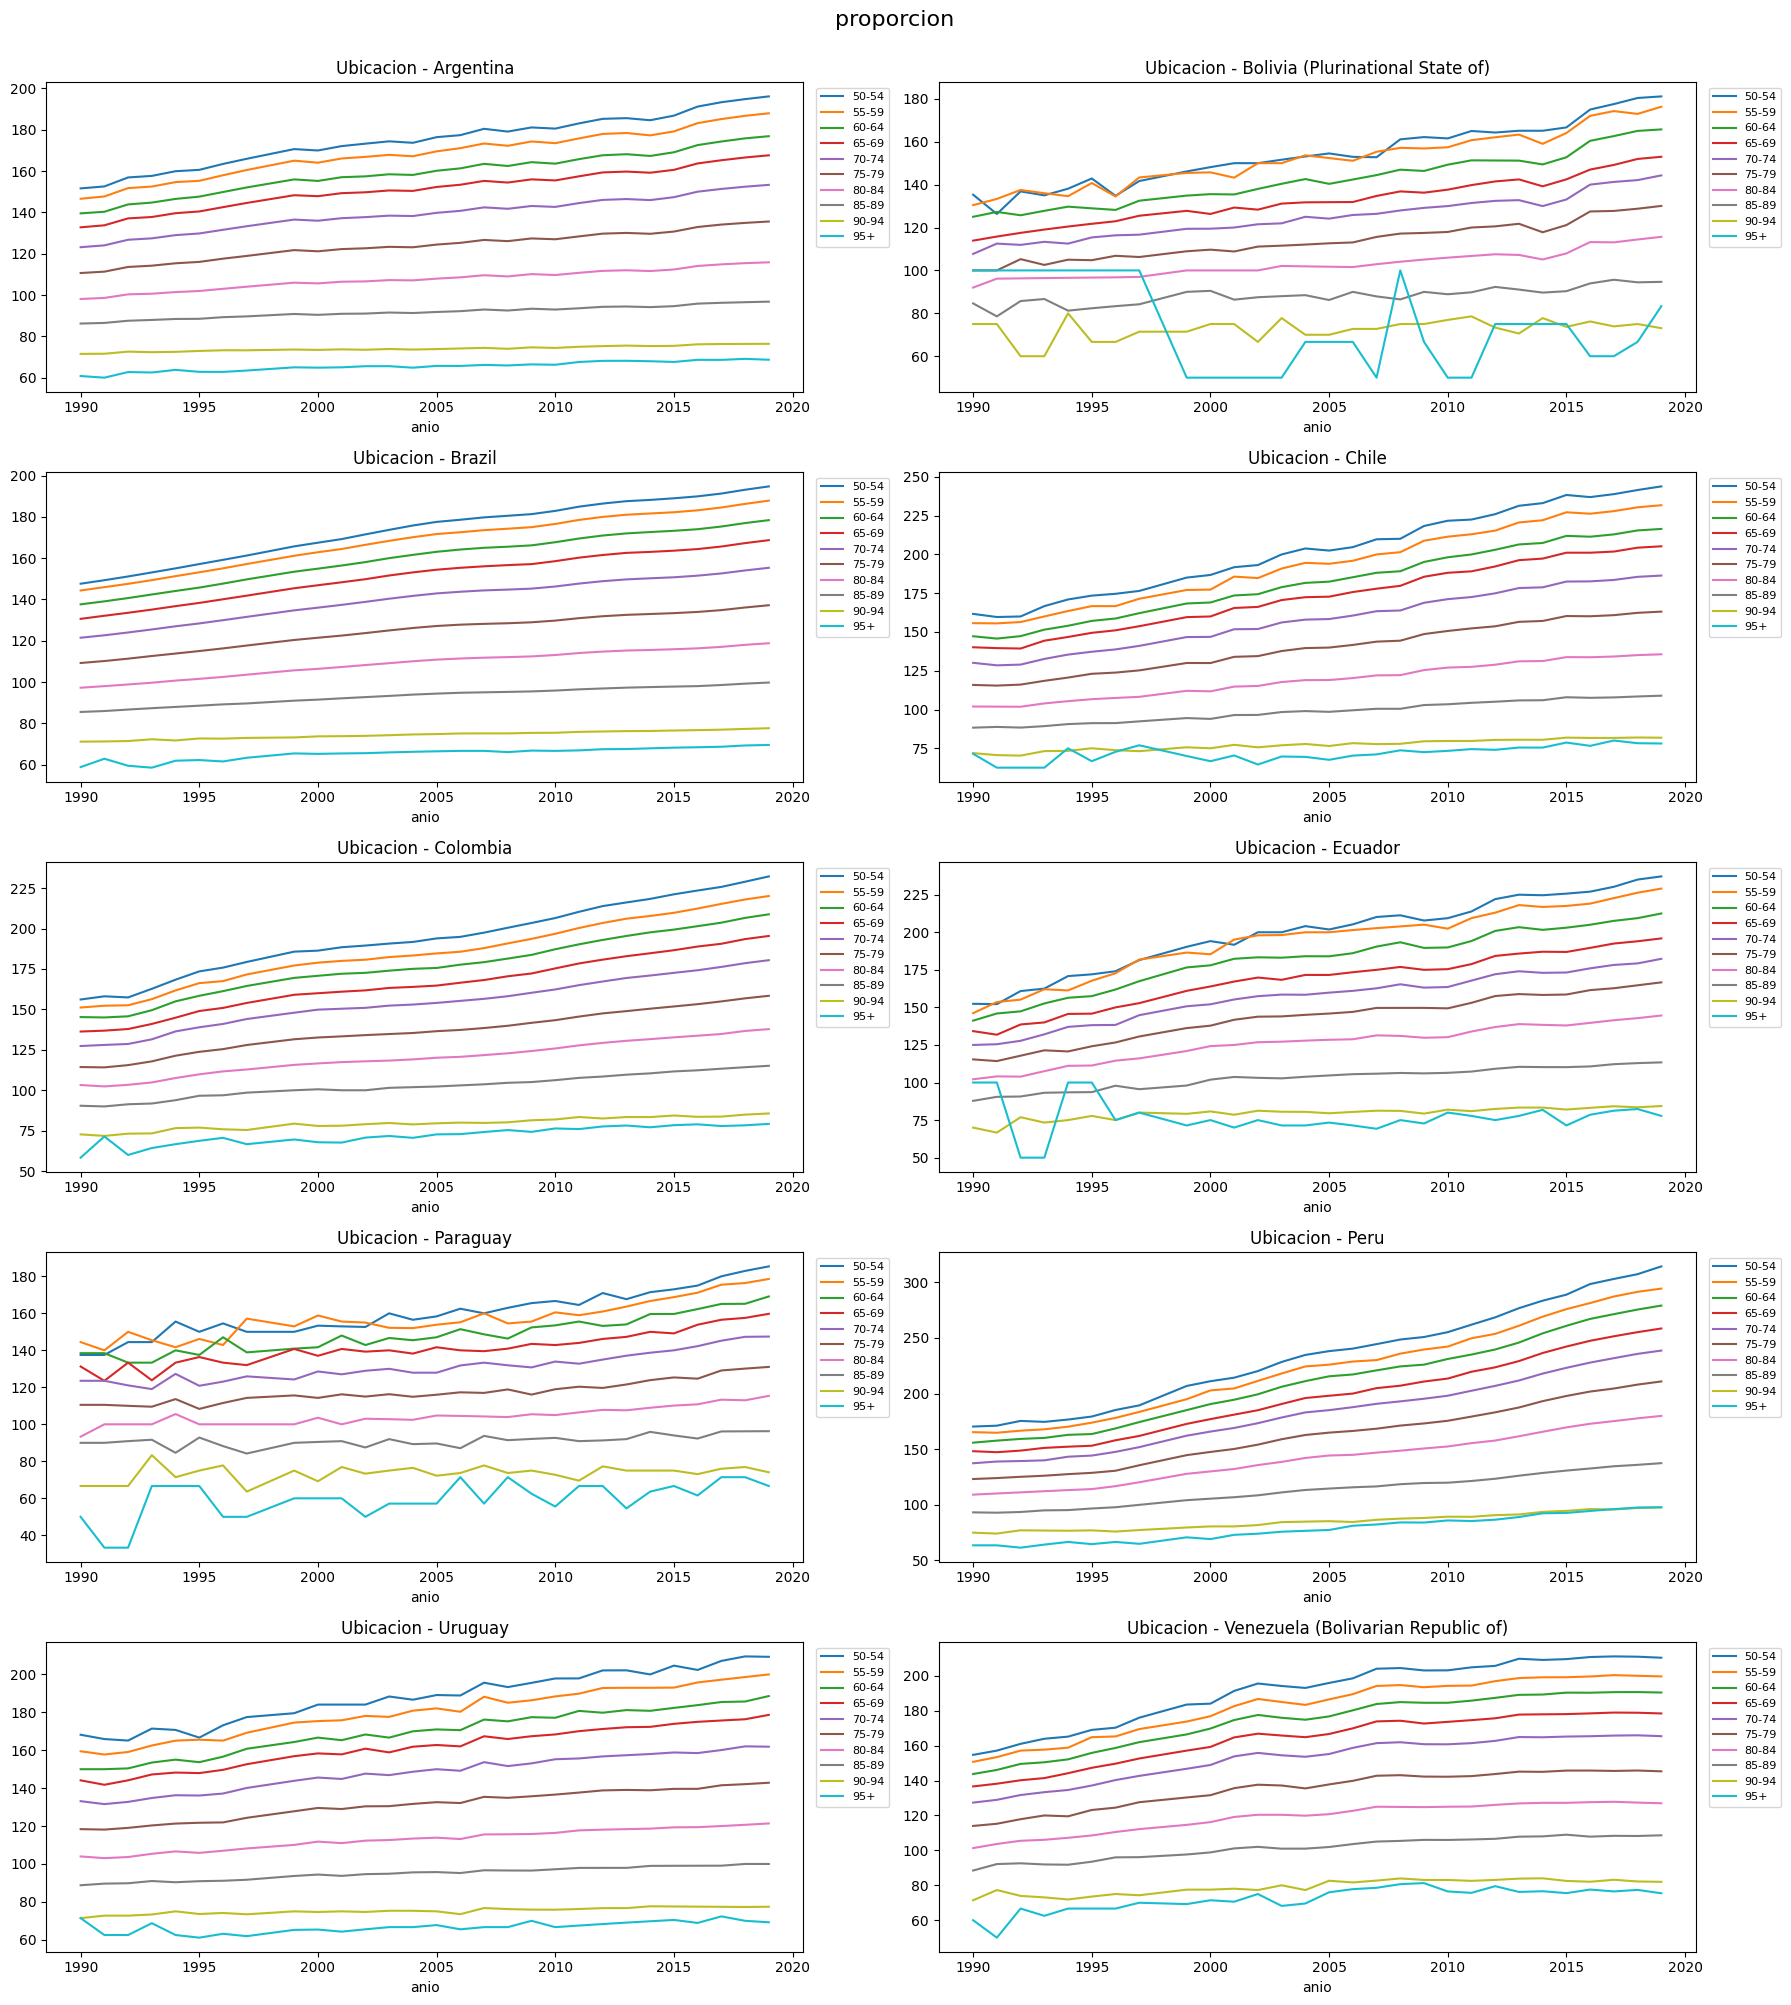

In [ ]:
subplot_dataframe('proporcion')

In [ ]:
cross_mortalidad = pd.pivot_table(full, values='tasa_mortalidad', index='anio', columns='ubicacion')
cross_mortalidad.head()

ubicacion,Argentina,Bolivia (Plurinational State of),Brazil,Chile,Colombia,Ecuador,Paraguay,Peru,Uruguay,Venezuela (Bolivarian Republic of)
anio,,,,,,,,,,
1990,193.067525,77.855092,91.163724,130.814455,80.520289,75.181976,58.621617,70.016903,271.223467,73.404415
1991,191.853972,76.790166,88.697341,131.438788,84.601468,72.528886,62.090148,65.830827,283.662589,73.582268
1992,194.605698,78.009690,88.867222,128.143409,84.698287,78.443065,61.841039,70.860442,274.543481,71.862053
1993,195.575366,76.957829,92.137187,126.041808,82.615260,73.661390,61.760216,72.798647,268.082385,75.905096
1994,194.706691,75.858941,91.498246,121.820287,81.849873,69.408142,63.167328,74.634690,261.171599,81.210364


In [ ]:
cross_incidencia = pd.pivot_table(full, values='tasa_incidencia', index='anio', columns='ubicacion')
cross_incidencia.head()

ubicacion,Argentina,Bolivia (Plurinational State of),Brazil,Chile,Colombia,Ecuador,Paraguay,Peru,Uruguay,Venezuela (Bolivarian Republic of)
anio,,,,,,,,,,
1990,173.042230,73.804935,80.443403,120.410131,75.276798,73.042100,49.861247,68.326380,255.358482,67.862714
1991,171.994216,72.897021,79.732116,116.762101,80.503652,70.555243,48.403402,64.405502,259.798760,68.322547
1992,178.574860,72.741524,79.925049,114.388604,79.021354,69.151869,49.368089,69.638824,253.292609,71.053016
1993,179.612091,72.112091,83.420611,115.962013,79.423429,66.915986,56.979513,72.357178,255.671236,73.636347
1994,180.573697,73.734986,84.345586,118.036308,81.571863,71.774624,57.263052,74.946332,247.024630,79.451395


In [ ]:
cross_proporcion = pd.pivot_table(full, values='proporcion', index='anio', columns='ubicacion')
cross_proporcion.head()

In [63]:
if download_excel:
  with pd.ExcelWriter(f'Análisis Mortalidad - Pais.xlsx') as writer:
    cross_mortalidad.to_excel(writer, sheet_name='tasa_mortalidad', index=False)
    cross_incidencia.to_excel(writer, sheet_name='tasa_incidencia', index=False)
    cross_proporcion.to_excel(writer, sheet_name='proporciones', index=False)

  files.download(f'Análisis Mortalidad - Pais.xlsx')